In [1]:
# begin by impoprting some useful libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from sklearn.metrics import r2_score
from scipy import stats

In [26]:
path = '../CM_VX809_F508del/docking/open_template_712/'

In [27]:
num_structs= range(1000)
scores = []
for i in num_structs:
    fnm = path +'scores/' + 'score_{}.sc'.format(i)
    file1 = open(fnm, 'r')
    Lines = file1.readlines()
    x = np.transpose([Lines[1].split(), Lines[2].split()])
    inter_score = float(x[49][1])
    scores.append(inter_score)

In [28]:
np.argsort(scores)[:10]

array([415, 315, 969, 629, 208, 269, 401, 927, 811, 953])

In [22]:
','.join([str(i) for i in np.argsort(scores)[:10]])

'415,315,969,629,208,269,401,927,811,953'

In [21]:
#','.join([str(i) for i in np.argsort(scores)[:100]])

In [7]:
#[print(scores[i]) for i in np.argsort(scores)[:30]]

In [8]:
# 7svr - 5uak with VX809 bound pdb struct for comparison
# 7SVD - 6msm with VX809 bound pbd struct for comparison

In [7]:
num_structs= range(1000)
scores = []
rmsd_no = []
rmsd_w = []
struct = []
for i in num_structs:
    fnm = path  + 'scores/' + 'score_{}.sc'.format(i)
    file1 = open(fnm, 'r')
    Lines = file1.readlines()
    x = np.transpose([Lines[1].split(), Lines[2].split()])
    inter_score = float(x[49][1])
    rms_no = float(x[53][1])
    rms_w = float(x[54][1])
    num = x[60][1].split("_")[5]
    scores.append(inter_score)
    rmsd_no.append(rms_no)
    rmsd_w.append(rms_w)
    struct.append(num)
    

In [10]:
x[49]

array(['interface_delta_X', '-13.671'], dtype='<U27')

In [11]:
rmsd_data1 = pd.DataFrame()
rmsd_data1['interface_delta_X'] = scores
rmsd_data1['ligand_rms_no_super_X'] = rmsd_no
rmsd_data1['ligand_rms_with_super_X'] =  rmsd_w
rmsd_data1['struct num'] = struct

In [21]:
num_structs= range(20)
scores = []
rmsd_no = []
rmsd_w = []
struct = []
for i in num_structs:
    fnm = path  + 'test_docked_native_pdbs/' + 'score_{}.sc'.format(i)
    file1 = open(fnm, 'r')
    Lines = file1.readlines()
    x = np.transpose([Lines[1].split(), Lines[2].split()])
    inter_score = float(x[49][1])
    rms_no = float(x[53][1])
    rms_w = float(x[54][1])
    num = x[60][1].split("_")[5]
    scores.append(inter_score)
    rmsd_no.append(rms_no)
    rmsd_w.append(rms_w)
    struct.append(num)

In [22]:
x[53]

array(['ligand_rms_no_super_X', '4.866'], dtype='<U30')

In [23]:
rmsd_data2 = pd.DataFrame()
rmsd_data2['interface_delta_X'] = scores
rmsd_data2['ligand_rms_no_super_X'] = rmsd_no
rmsd_data2['ligand_rms_with_super_X'] =  rmsd_w
rmsd_data2['struct num'] = struct

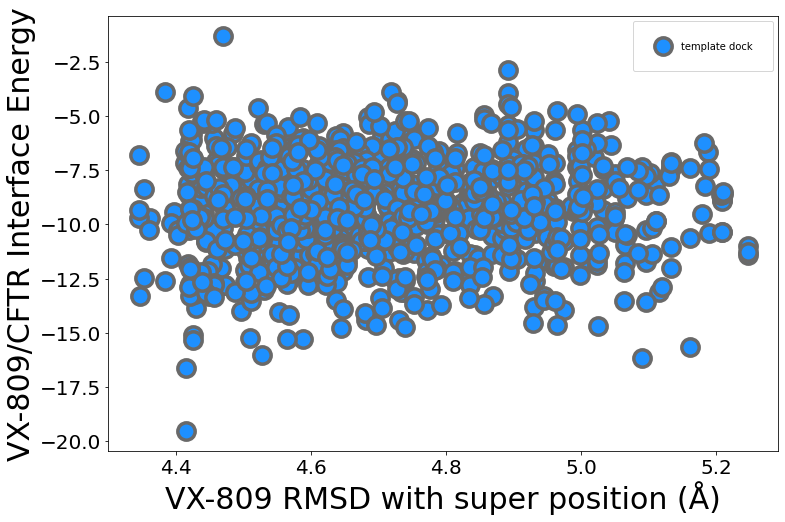

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(rmsd_data1['ligand_rms_with_super_X'], rmsd_data1['interface_delta_X'], c='dodgerblue', edgecolors='dimgrey', s=300, lw=3.5)

#plt.scatter(rmsd_data2['ligand_rms_no_super_X'], rmsd_data2['interface_delta_X'], c='dodgerblue', edgecolors='dimgrey', s=300, lw=3.5)

#for i,val in rmsd_data2['ligand_rms_no_super_X'].items():
 #   if val <= 6:
  #      print()
   #     plt.text(val,rmsd_data2['interface_delta_X'][i], rmsd_data2['struct num'][i], size=15)

plt.xlabel('VX-809 RMSD with super position (\u212B)', size=30)
plt.xticks(size=20)
plt.ylabel('VX-809/CFTR Interface Energy', size=30)
plt.yticks(size=20)
labels = ['template dock', 'native dock']
plt.legend(labels, labelspacing=2, borderpad=2)

plt.show()

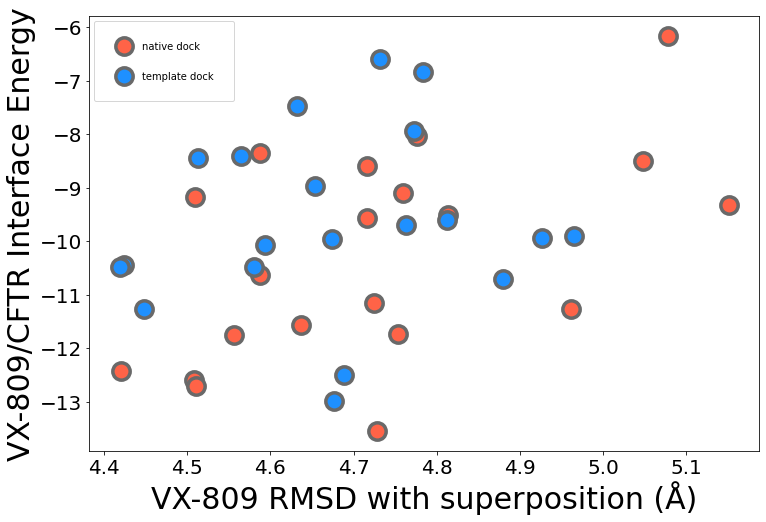

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(rmsd_data1['ligand_rms_with_super_X'], rmsd_data1['interface_delta_X'], c='tomato', edgecolors='dimgrey', s=300, lw=3.5)

plt.scatter(rmsd_data2['ligand_rms_with_super_X'], rmsd_data2['interface_delta_X'], c='dodgerblue', edgecolors='dimgrey', s=300, lw=3.5)

#for i,val in rmsd_data['ligand_rms_with_super_X'].items():
 #   if val <= 4:
  #      struct_num = rmsd_data['description'][i].split('_')[4]
   #     print(struct_num)
    #    plt.text(val,rmsd_data['interface_delta_X'][i], struct_num, size=15)

plt.xlabel('VX-809 RMSD with superposition (\u212B)', size=30)
plt.xticks(size=20)
plt.ylabel('VX-809/CFTR Interface Energy', size=30)
plt.yticks(size=20)
labels = ['native dock', 'template dock']
plt.legend(labels, labelspacing=2, borderpad=2)
plt.show()